In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *
from mpl_toolkits.mplot3d import Axes3D

windows = 350

In [19]:
utilization_path = "./data/MI_timesteps.txt"
utilization_data = pd.read_csv(utilization_path, header='infer', delimiter=" ", skiprows=range(1, 1001))

In [79]:
utilization_data.columns.values

array(['timeStep', 'areaDensityCounting-PID5', 'areaDensityCounting-PID6',
       'areaDensityCounting-PID7', 'areaDensityCounting-PID8',
       'areaDensityCounting-PID9', 'areaDensityCounting-PID10',
       'areaDensityCounting-PID11', 'areaDensityCounting-PID12',
       'areaDensityCounting-PID13'], dtype=object)

In [21]:
utilization_data

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
0,1001,0,2,97,7,0,0,5,1,43
1,1002,0,2,96,7,0,0,5,1,45
2,1003,0,2,95,6,0,0,5,0,46
3,1004,0,2,94,6,0,0,4,1,46
4,1005,0,2,92,6,0,0,5,0,46
...,...,...,...,...,...,...,...,...,...,...
13996,14997,0,10,95,4,0,0,2,1,39
13997,14998,0,10,94,3,0,0,3,1,39
13998,14999,0,10,93,3,0,1,2,1,40
13999,15000,0,10,93,3,0,1,3,1,41


## First Part

In [80]:
PID5 = np.array(utilization_data['areaDensityCounting-PID5'])
PID6 = np.array(utilization_data['areaDensityCounting-PID6'])
PID7 = np.array(utilization_data['areaDensityCounting-PID7'])

In [77]:
PID5[14000]

0

<function matplotlib.pyplot.show(*args, **kw)>

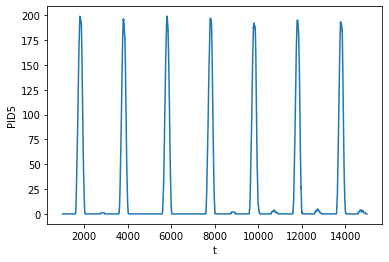

In [78]:
plt.plot(utilization_data['timeStep'], PID5)
plt.xlabel('t')
plt.ylabel('PID5')
plt.show

In [81]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window, window + 1)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

PID5_slided = rolling_window(PID5, windows)
PID6_slided = rolling_window(PID6, windows)
PID7_slided = rolling_window(PID7, windows)

In [91]:
data =  np.concatenate((PID5_slided, PID6_slided, PID7_slided),axis=1)
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)

In [92]:
data_norm.shape

(13651, 1053)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
projected = pca.fit_transform(data_norm)

explained_variance_sk = pca.explained_variance_ratio_
expl_var_cumsum_sk = np.cumsum(explained_variance_sk)

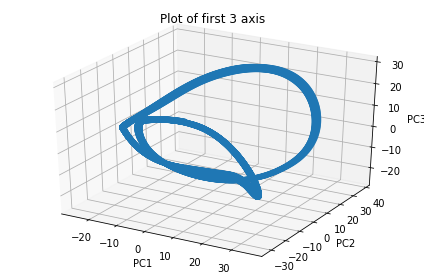

In [97]:
fig = plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Plot of first 3 axis')
fig.tight_layout()

## Part 2